In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.random.random((1000, 1, 1)) * 10 - 5
y_train = (x_train ** 2).reshape(len(x_train),)

In [3]:
print(x_train.shape)
print(y_train.shape)

(1000, 1, 1)
(1000,)


In [4]:
W1 = np.random.rand(1, 20)
W2 = np.random.rand(20, 1)
b1 = np.random.rand(1,20)
b2 = np.random.rand(1,1)

In [5]:
print(f'{W1.shape=} {W2.shape=} {b1.shape=} {b2.shape=}')

W1.shape=(1, 20) W2.shape=(20, 1) b1.shape=(1, 20) b2.shape=(1, 1)


In [6]:
def ReLU(a):
  return np.maximum(a, 0)

def ReLU_derivitive(a):
  return a > 0

In [7]:
def forward(x, W1, W2, b1, b2):
  z1 = np.dot(x, W1) + b1
  a1 = ReLU(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = z2
  yhat = a2
  return yhat

In [8]:
def backprop(x, W1, W2, b1, b2, y, yhat, alpha):
  z1 = np.dot(x, W1) + b1
  a1 = ReLU(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = z2

  dl_dz2 = a2 - y
  dl_db2 = dl_dz2
  dl_dW2 = np.dot(a1.T, dl_dz2)

  dl_da1 = np.dot(W2, dl_dz2)
  dl_dz1 = dl_da1 * ReLU_derivitive(z1).T

  dl_db1 = dl_dz1
  dl_dW1 = np.dot(dl_dz1, x).T

  b1 = b1 - alpha * dl_db1.T
  W1 = W1 - alpha * dl_dW1
  b2 = b2 - alpha * dl_db2
  W2 = W2 - alpha * dl_dW2

  return W1, W2, b1, b2

Before Learning


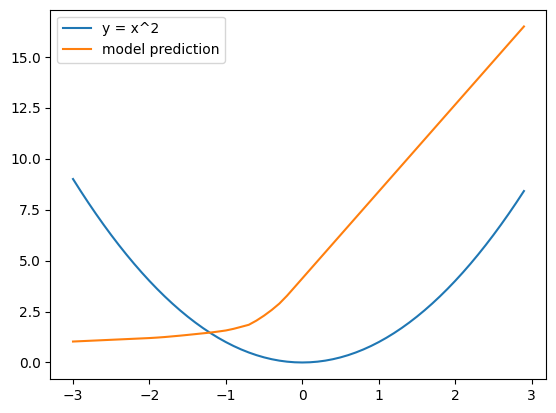

In [9]:
print('Before Learning')
x_test = np.arange(-3, 3, 0.1)
y_test = x_test ** 2

x_test = x_test.reshape(len(x_test), 1, 1)
yhat_test = np.array([forward(x_test[i], W1, W2, b1, b2) for i in range(len(x_test))])
yhat_test = yhat_test.reshape(len(yhat_test,))

plt.plot(x_test.reshape(len(x_test), ), y_test, label='y = x^2')
plt.plot(x_test.reshape(len(x_test), ), yhat_test, label='model prediction')
plt.legend()
plt.show()

In [10]:
alpha = 0.01
epochs = 500

for epoch in range(epochs):
  for i in range(len(x_train)):
    yhat = forward(x_train[i], W1, W2, b1, b2)
    W1, W2, b1, b2 = backprop(x_train[i], W1, W2, b1, b2, y_train[i], yhat, alpha=alpha)


After Learning


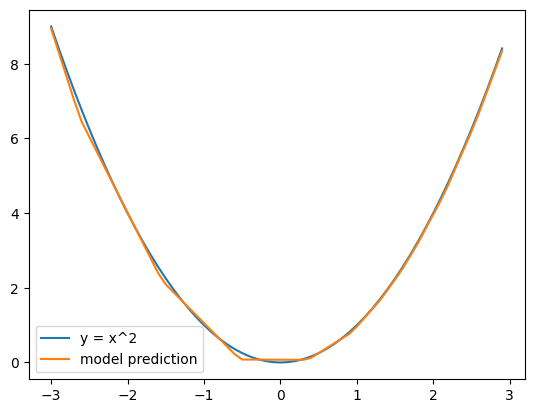

In [11]:
print('After Learning')
x_test = np.arange(-3, 3, 0.1)
y_test = x_test ** 2

x_test = x_test.reshape(len(x_test), 1, 1)
yhat_test = np.array([forward(x_test[i], W1, W2, b1, b2) for i in range(len(x_test))])
yhat_test = yhat_test.reshape(len(yhat_test,))

plt.plot(x_test.reshape(len(x_test), ), y_test, label='y = x^2')
plt.plot(x_test.reshape(len(x_test), ), yhat_test, label='model prediction')
plt.legend()
plt.show()